# Telecom Network Usage Analysis (Milan CDR Dataset)

This project analyzes one week of telecom usage data (calls, SMS, and internet) across cell towers in Milan.  
The goal is to uncover hourly/daily patterns, identify high-load towers, and generate insights for network optimization.

**Dataset:** Telecom Italia Big Data Challenge (1–7 Nov 2013)  
**Rows:** ~15 million  
**Skills:** Python, Pandas, NumPy, Matplotlib, Seaborn, EDA, Time-series analysis



# Problem Statement
Telecom networks experience fluctuating demand across time and locations, which can lead to congestion
and degraded service quality.  
The objective of this analysis is to:
- Identify peak usage hours and daily traffic patterns  
- Detect high-load cell towers that may become congestion points  
- Understand correlations between different telecom services  
- Provide insights to support network capacity planning and optimization


## 1. Import Libraries & Settings

In [1]:
import pandas as pd
import glob

files = glob.glob(r"C:\Users\ishan\OneDrive\Desktop\Data\Telecom data\Telecom\*.csv")



## 2. Data Loading & Merging
We use `glob` to read all daily CSV files (1–7 November) and combine them into a single DataFrame with a `date` column.


In [5]:
files = glob.glob(r"C:\Users\ishan\OneDrive\Desktop\Data\Telecom data\Telecom\sms-call-internet-mi-2013-11-*.csv")

df_list = []
for file in files:
    temp = pd.read_csv(file)
    temp['date'] = file[-14:-4]  # extract 2013-11-01
    df_list.append(temp)

df = pd.concat(df_list, ignore_index=True)

print(df.head())
print(df.shape)


              datetime  CellID  countrycode   smsin  smsout  callin  callout  \
0  2013-11-01 00:00:00       1            0  0.3521     NaN     NaN   0.0273   
1  2013-11-01 00:00:00       1           33     NaN     NaN     NaN      NaN   
2  2013-11-01 00:00:00       1           39  1.7322  1.1047  0.5919   0.4020   
3  2013-11-01 00:00:00       2            0  0.3581     NaN     NaN   0.0273   
4  2013-11-01 00:00:00       2           33     NaN     NaN     NaN      NaN   

   internet        date  
0       NaN  2013-11-01  
1    0.0261  2013-11-01  
2   57.7729  2013-11-01  
3       NaN  2013-11-01  
4    0.0274  2013-11-01  
(15089165, 9)


In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour

## 3. Data Overview

The first few rows and schema help verify that all files merged correctly and columns are in the expected format.


In [9]:
df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,hour
0,2013-11-01,1,0,0.3521,NaN,NaN,0.0273,NaN,2013-11-01,0
1,2013-11-01,1,33,NaN,NaN,NaN,NaN,0.0261,2013-11-01,0
2,2013-11-01,1,39,1.7322,1.1047,0.5919,0.4020,57.7729,2013-11-01,0
3,2013-11-01,2,0,0.3581,NaN,NaN,0.0273,NaN,2013-11-01,0
4,2013-11-01,2,33,NaN,NaN,NaN,NaN,0.0274,2013-11-01,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15089165 entries, 0 to 15089164
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   CellID       int64         
 2   countrycode  int64         
 3   smsin        float64       
 4   smsout       float64       
 5   callin       float64       
 6   callout      float64       
 7   internet     float64       
 8   date         object        
 9   hour         int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(1)
memory usage: 1.1+ GB


## 4. Summary Statistics

Summary of call, SMS, and internet usage across the dataset.


In [19]:
pd.set_option('display.float_format', '{:.3f}'.format)
df[['smsin', 'smsout', 'callin', 'callout', 'internet']].describe()

,smsin,smsout,callin,callout,internet
count,6023545.000,3546510.000,4109309.000,6484303.000,6719964.000
mean,7.554,7.248,7.348,5.341,102.324
std,26.466,24.403,28.651,25.286,419.586
min,0.000,0.000,0.000,0.000,0.000
25%,0.104,0.094,0.059,0.057,0.058
50%,0.623,0.577,0.254,0.211,0.208
75%,4.660,4.476,2.362,1.050,9.899
max,2288.739,2270.682,1328.088,1511.686,31748.632


The summary statistics reveal that internet traffic dominates overall telecom usage, with an average value of 102.32 units, which is nearly 15 times higher than the average for calls and SMS. However, the median internet usage is very low (0.20 units), indicating that most grid cells and hours experience minimal activity.
A small number of intervals experience extremely high traffic spikes (up to 31,748 units), showing a highly skewed distribution.
This pattern is typical in telecom networks, where a few hotspots generate the majority of total traffic.

Call and SMS metrics show similar behavior: very low median usage but occasional spikes over 1,000 units, reflecting uneven demand across different regions and time intervals.

Overall, the data demonstrates strong variability in telecom activity, providing valuable opportunities for analyzing peak hours, high-load zones, and network optimization strategies.

## 5. Daily Internet/SMS/Call Usage

Daily totals help identify day-to-day variation and detect weekly trends.


In [20]:
daily_usage = df.groupby('date')[['smsin','smsout','callin','callout','internet']].sum()
daily_usage


,smsin,smsout,callin,callout,internet
date,,,,,
2013-11-01,4606387.347,2822430.043,2622799.905,3196762.231,82479246.591
2013-11-02,4750039.819,2805883.598,2835598.719,3413080.350,80991016.618
2013-11-03,4378161.543,2782034.470,2285273.845,2806807.292,83509155.207
2013-11-04,7742700.173,4288716.276,5409633.932,6166560.311,108106879.129
2013-11-05,7931791.002,4368527.165,5692466.199,6476254.516,111124132.339
2013-11-06,7947298.035,4351455.570,5702408.667,6340527.079,111009151.323
2013-11-07,8144553.603,4286852.258,5648970.006,6231773.566,110396471.402


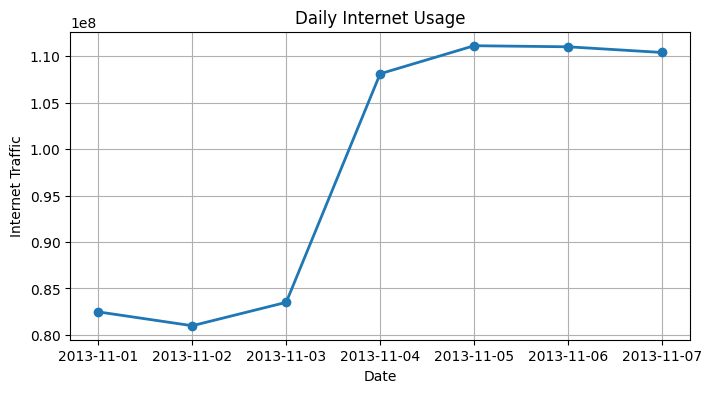

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(daily_usage.index, daily_usage['internet'], marker='o', linewidth=2)
plt.title("Daily Internet Usage")
plt.xlabel("Date")
plt.ylabel("Internet Traffic")
plt.grid(True)
plt.show()


Daily telecom usage increases significantly from 4 November onward across all activity types (SMS, calls, internet). Internet traffic, in particular, rises from around 82–83 million units in the first three days to over 108 million units starting on 4 November, marking a nearly 30% increase.
The highest traffic day is 5 November, with internet usage exceeding 111 million units, followed closely by 6 and 7 November.

This pattern indicates that mid-week days experience substantially heavier network load, consistent with normal working-day behavior. Weekends (2 and 3 November) show noticeably lower call and SMS activity, while internet usage remains relatively stable but slightly elevated on Sunday.
These trends highlight typical telecom network behavior, where weekday usage outpaces weekend demand and certain days create peak load conditions requiring capacity planning.

## 6. Hourly Internet Usage

Hourly aggregation reveals peak and off-peak network load.


In [28]:
hourly_usage = df.groupby('hour')[['smsin','smsout','callin','callout', 'internet']].sum()
hourly_usage

,smsin,smsout,callin,callout,internet
hour,,,,,
0,605281.951,555504.401,179763.237,229094.806,23488851.463
1,313991.238,332422.037,89763.219,122870.622,19563532.981
2,192827.312,241459.415,53947.312,81205.549,16863774.334
3,137907.255,205611.939,38472.927,68224.103,15064821.019
4,118534.095,190267.758,38013.755,65641.109,14022128.137
5,131260.396,199254.558,47768.588,76416.417,13881564.198
6,260222.017,302826.485,108936.417,156704.050,15617207.410
7,825880.189,709768.080,426665.270,550602.534,21545652.653
8,2519444.206,1187291.073,1193613.652,1444437.141,28160112.031


In [29]:
hourly_usage['total_traffic'] = (
    hourly_usage['smsin'] +
    hourly_usage['smsout'] +
    hourly_usage['callin'] +
    hourly_usage['callout'] +
    hourly_usage['internet']
)

hourly_usage


,smsin,smsout,callin,callout,internet,total_traffic
hour,,,,,,
0,605281.951,555504.401,179763.237,229094.806,23488851.463,25058495.858
1,313991.238,332422.037,89763.219,122870.622,19563532.981,20422580.096
2,192827.312,241459.415,53947.312,81205.549,16863774.334,17433213.923
3,137907.255,205611.939,38472.927,68224.103,15064821.019,15515037.243
4,118534.095,190267.758,38013.755,65641.109,14022128.137,14434584.854
5,131260.396,199254.558,47768.588,76416.417,13881564.198,14336264.158
6,260222.017,302826.485,108936.417,156704.050,15617207.410,16445896.378
7,825880.189,709768.080,426665.270,550602.534,21545652.653,24058568.725
8,2519444.206,1187291.073,1193613.652,1444437.141,28160112.031,34504898.103


In [31]:
hourly_usage.sort_values('total_traffic', ascending= False).head()

,smsin,smsout,callin,callout,internet,total_traffic
hour,,,,,,
17,3171018.961,1609120.079,2611017.702,2903617.055,37245535.866,47540309.663
18,2713022.868,1613627.854,2465497.810,2779116.181,37218121.002,46789385.715
16,3116738.431,1535691.167,2408171.301,2667082.140,36882278.150,46609961.189
14,3059571.616,1544605.616,2091309.410,2345092.401,37106101.383,46146680.425
12,3297779.507,1598983.272,2377119.499,2628802.824,36134588.130,46037273.232


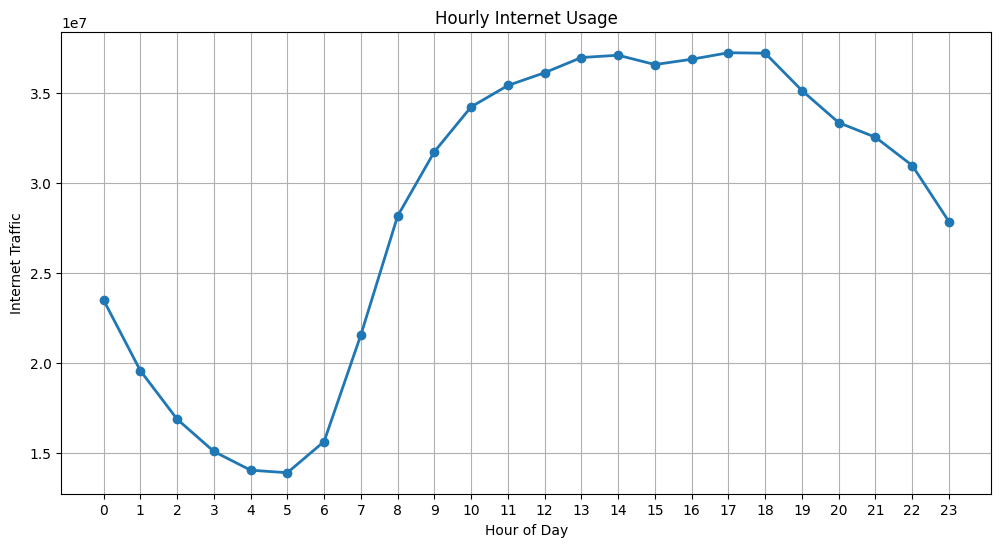

In [33]:
plt.figure(figsize=(12,6))
plt.plot(hourly_usage.index, hourly_usage['internet'], marker='o', linewidth=2)
plt.title("Hourly Internet Usage")
plt.xlabel("Hour of Day")
plt.ylabel("Internet Traffic")
plt.grid(True)
plt.xticks(range(0,24))
plt.show()

Hourly Usage Insights

The hourly internet usage pattern shows a clear daily cycle.
Traffic is lowest between 3 AM and 6 AM (early morning off-peak period), where usage drops to around 1.4–1.5 crore units, indicating minimal user activity.

Starting around 7 AM, network usage increases sharply as people begin their day.
A steep rise occurs between 7 AM and 10 AM, reaching over 3 crore units as users come online for work, school, and morning routines.

Internet traffic stays consistently high from 10 AM to 6 PM, with usage ranging between 3.5–3.8 crore units.
This period represents the busiest continuous block of the day, indicating sustained demand across both residential and commercial zones.

The absolute peak occurs around 1 PM to 5 PM, reaching close to 3.8 crore units, after which usage slightly decreases but remains high until 8 PM.

Post 9 PM, traffic gradually declines as users go offline, but even late evening usage remains significantly higher than early morning levels, reflecting evening entertainment and streaming activity.

Overall, the pattern clearly shows:

Off-peak hours: 2 AM – 6 AM

Ramp-up period: 7 AM – 10 AM

Sustained high usage: 10 AM – 6 PM

Peak hours: 1 PM – 5 PM

Evening cool-down: 8 PM – 11 PM

This is a classic telecom traffic curve observed in real network operations.

## 7. Cell Tower (CellID) Network Load Analysis

Aggregating internet usage per tower helps identify high-demand zones and potential congestion points.


In [35]:
cell_usage = df.groupby('CellID')['internet'].sum().sort_values(ascending=False)
cell_usage.head(10)


CellID
5161   1514766.839
5059   1301887.736
5259   1203501.335
5061   1137295.942
5258   1053946.572
4459   1011601.952
6064   1002268.487
5159    996581.948
5758    976711.107
4856    943186.330
Name: internet, dtype: float64

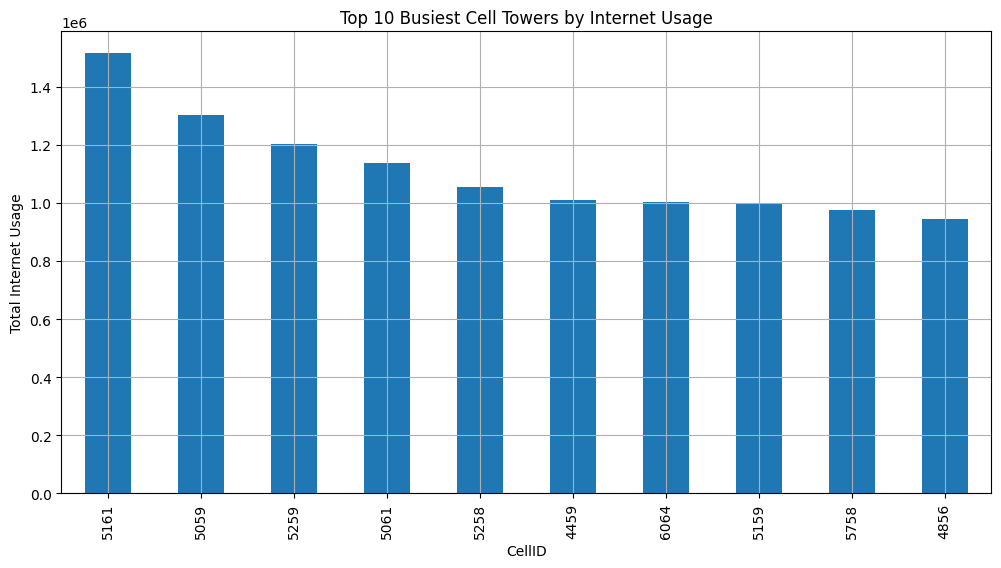

In [36]:
top10 = cell_usage.head(10)
top10.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Busiest Cell Towers by Internet Usage")
plt.xlabel("CellID")
plt.ylabel("Total Internet Usage")
plt.grid(True)
plt.show()

Cell Tower (CellID) Network Load Analysis

To identify high-demand areas in the network, total internet usage was aggregated for each CellID.
The top 10 busiest towers show a significant concentration of traffic:

CellID 5161 is the most heavily used tower, handling approximately 1.51 million units of internet traffic over the week.

Other high-load towers include 5059, 5259, and 5061, each exceeding 1.1 million units.

The large difference between the busiest and the 10th busiest tower indicates a strong imbalance in network usage, where a few towers carry disproportionately high traffic.
Interestingly, several high-load CellIDs appear in numerical clusters (such as 5059–5061 and 5258–5259), suggesting geographically adjacent or functionally similar regions with high connectivity demand.

These findings highlight potential congestion zones that may require capacity upgrades, load balancing, or additional cell deployment.

## 8. Correlation Between Telecom Services

Correlation shows how SMS, call, and internet usage relate across the network.


In [37]:
corr = df[['smsin', 'smsout', 'callin', 'callout', 'internet']].corr()
corr

,smsin,smsout,callin,callout,internet
smsin,1.000,0.861,0.884,0.863,0.903
smsout,0.861,1.000,0.858,0.855,0.866
callin,0.884,0.858,1.000,0.982,0.857
callout,0.863,0.855,0.982,1.000,0.850
internet,0.903,0.866,0.857,0.850,1.000


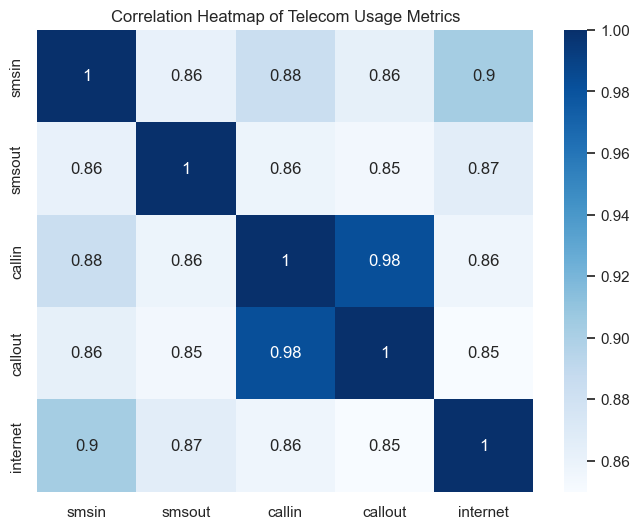

In [47]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Telecom Usage Metrics")
plt.show()

Correlation Insights

The correlation matrix shows strong positive relationships across all telecom usage metrics.
The highest correlation is between incoming and outgoing calls (0.982), indicating that locations with high calling activity tend to be consistently busy in both directions.
Similarly, SMS-in and SMS-out show very high correlation (0.861), suggesting balanced text messaging behavior.

A notable finding is the strong correlation between internet usage and all other metrics (0.85–0.90).
This indicates that regions with high data consumption also experience increased SMS and call activity.
These zones represent significant network load hotspots and may require capacity enhancement or optimization.

Overall, the correlations confirm consistent usage patterns across services and highlight geographically concentrated demand areas within the network.

## 9. Hour × Day Heatmap

This heatmap highlights differences in traffic intensity across hours and days.


In [49]:
heatmap_data = df.pivot_table(
    values = 'internet',
    index='hour',
    columns='date',
    aggfunc = 'sum'
)
heatmap_data

date,2013-11-01,2013-11-02,2013-11-03,2013-11-04,2013-11-05,2013-11-06,2013-11-07
hour,,,,,,,
0,3623713.248,3010910.220,3370565.363,3220624.756,3391925.907,3464106.958,3407005.010
1,3087452.171,2502896.432,2797797.915,2643879.174,2804277.707,2872883.655,2854345.926
2,2668822.689,2146775.277,2359445.334,2306080.153,2425739.798,2477947.451,2478963.633
3,2366073.535,1879246.480,2046432.047,2091480.678,2190278.826,2258528.667,2232780.785
4,2158129.025,1734990.050,1840069.308,1984767.083,2084588.760,2120690.937,2098892.975
5,2026641.286,1700360.482,1756712.386,2024632.689,2112314.043,2141128.455,2119774.858
6,2068599.010,1781472.715,1796655.717,2386273.177,2518672.560,2567112.102,2498422.130
7,2343251.771,2068070.131,1964716.654,3593491.383,3881611.370,3892092.364,3802418.979
8,2822517.807,2572932.068,2351760.802,4886329.018,5214372.124,5181985.287,5130214.926


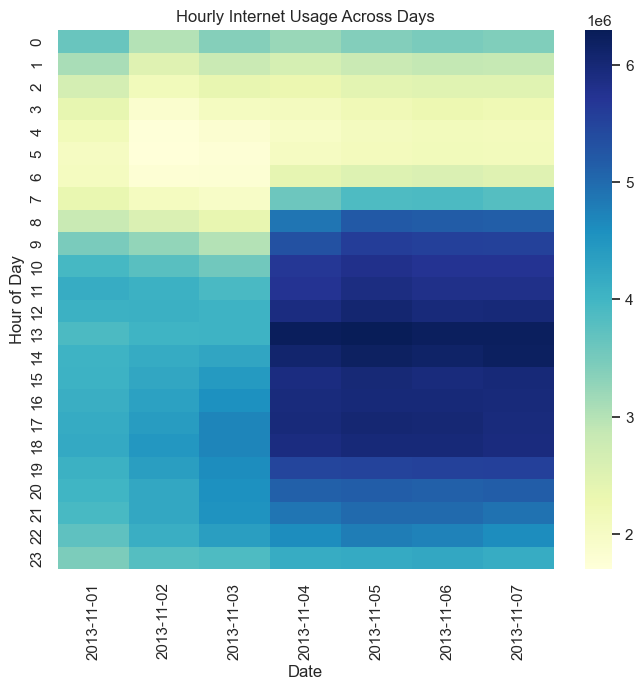

In [53]:
plt.figure(figsize=(8,7))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Hourly Internet Usage Across Days")
plt.xlabel("Date")
plt.ylabel("Hour of Day")
plt.show()

Hourly Internet Usage Heatmap Insights

The heatmap illustrates clear daily and hourly traffic patterns across the network.
Internet usage is lowest between midnight and 6 AM on all days, reflecting minimal activity during early morning hours.

Usage increases significantly beginning at 7 AM, with a sharp rise between 8 AM and 11 AM.
The highest traffic levels occur consistently between 11 AM and 5 PM, forming a dark band across the heatmap.
These peak hours reflect heavy work-related and daytime browsing activity.

Evening usage remains elevated until around 8–9 PM before gradually declining.

Notably, traffic intensifies significantly from 4 November onward, consistent with earlier findings showing increased mid-week activity.
Weekend days (2 and 3 November) show visibly lighter colors, indicating lower demand compared to weekdays.

Overall, the heatmap confirms strong hourly patterns, weekday–weekend differences, and a mid-week surge in network load.

## 10. Final Insights & Recommendations



1. Daily Usage Patterns

*Internet traffic increases sharply starting 4 November, nearly 30% higher than the first three days.

*Peak daily usage occurs on 5–7 November, all exceeding 110 million units.

*Weekend days (2–3 November) show reduced call and SMS activity but stable internet usage.

2. Hourly Network Activity

*Lowest usage: 2 AM – 6 AM

*Sharp rise: begins at 7 AM

*Peak hours: 11 AM – 5 PM (consistent across all days)

*Evening hours remain busy until around 8–9 PM, after which overall activity declines.

These patterns reflect typical user behavior: early morning inactivity, morning ramp-up, work-hour peaks, and evening entertainment usage.

3. High Load Cell Towers

*A few towers, especially CellID 5161, 5059, and 5259, experience extremely high usage (over 1 million units each).

*High-load towers appear in number clusters, indicating specific geographic regions generating heavy data demand.

*This traffic imbalance suggests potential congestion zones that may require optimization.

4. Cross-Metric Correlation

*Incoming and outgoing calls: extremely high correlation (0.982), meaning voice traffic is balanced.

*SMS in/out: very strong correlation (0.861), showing symmetrical communication.

*Internet - Calls/SMS: strong correlations (0.85–0.90), meaning regions with high data usage also have high call/SMS volumes.

This indicates that certain areas rely heavily on all telecom services simultaneously.

5. Recommendations for Network Optimization

*Capacity Upgrades: High-load towers (5161, 5059, 5259) may require bandwidth expansion or small cell deployment.

*Load Balancing: Peak-hour traffic (11 AM – 5 PM) suggests scheduling maintenance outside this window.

*Dynamic Resource Allocation: Allocate more spectrum or backhaul resources during mid-day peak hours.

*User Behavior Insights: Promotions/marketing can target mid-week and peak usage times for better uptake.


## Conclusion

The dataset reveals clear temporal and spatial usage trends across the telecom network.
By analyzing hourly, daily, and cell-level patterns, we identify both peak demand periods and high-load regions that drive overall network usage.
These insights can guide decisions around capacity planning, network scaling, and service optimization.